In [2]:
import json

In [33]:
#sample_match = '2018_404_MS001'
sample_match = '2019_404_MS007'

match_info = json.load(open(f'./results/match_info/{sample_match}.json'))
second_screen = json.load(open(f'./results/second_screen/{sample_match}.json'))
widget = json.load(open(f'./results/widget_data/{sample_match}.json'))

In [34]:
match_info

{'Tournament': {'EventId': '404',
  'EventYear': 2019,
  'TournamentName': 'BNP Paribas Open',
  'TournamentCity': 'Indian Wells',
  'TournamentUrl': '/en/tournaments/indian-wells/404/overview',
  'Singles': 96,
  'Doubles': 32,
  'Court': 'Hard',
  'StartDate': '2019-03-07T00:00:00',
  'EndDate': '2019-03-17T00:00:00',
  'PrizeMoney': 8359455,
  'CurrencySymbol': '$'},
 'Match': {'TeamTieResults': None,
  'MatchId': 'MS007',
  'DateSeq': None,
  'CourtId': None,
  'CourtName': None,
  'Round': {'RoundId': '5', 'ShortName': 'QF', 'LongName': 'Quarter-Finals'},
  'MatchTime': '02:17:00',
  'IsDoubles': False,
  'IsQualifier': None,
  'IsWatchLive': None,
  'NumberOfSets': 2,
  'ScoringSystem': None,
  'Status': 'F',
  'LastServer': None,
  'Winner': 'N409',
  'Message': None,
  'Reason': None,
  'PlayerTeam1': {'PlayerId': 'N409',
   'PartnerId': None,
   'PlayerFirstName': 'R.',
   'PlayerLastName': 'Nadal',
   'PlayerCountryCode': 'ESP',
   'PartnerFirstName': '',
   'PartnerLastName'

In [35]:
second_screen

{'NumSets': 3,
 'IsMatchInProgress': False,
 'PlayerTeam': {'PlayerId': 'KE29',
  'PlayerDisplayName': 'K. Khachanov',
  'Set': [{'SetNumber': 0,
    'ServePlacement': {'FirstServe': {'AdCourt': {'PercentageT': '43%',
       'PercentageMid': '0%',
       'PercentageWide': '57%',
       'T': {'Aces': {'Count': 1,
         'Coords': [{'X': -4.902, 'Y': 0.073, 'Z': 0.038}]},
        'ServicePointsWon': {'Count': 6,
         'Coords': [{'X': -6.164, 'Y': 0.426, 'Z': 0.035},
          {'X': 5.062, 'Y': -1.109, 'Z': 0.034},
          {'X': -4.601, 'Y': 0.163, 'Z': 0.039},
          {'X': 4.385, 'Y': -0.206, 'Z': 0.032},
          {'X': -4.813, 'Y': 0.749, 'Z': 0.038},
          {'X': 4.252, 'Y': -0.988, 'Z': 0.031}]},
        'ServicePointsLost': {'Count': 6,
         'Coords': [{'X': -5.465, 'Y': 1.221, 'Z': 0.034},
          {'X': -4.147, 'Y': 0.784, 'Z': 0.04},
          {'X': -4.779, 'Y': 0.549, 'Z': 0.038},
          {'X': 5.383, 'Y': -0.018, 'Z': 0.034},
          {'X': -4.955, 'Y': 0.

In [36]:
second_screen.keys()

dict_keys(['NumSets', 'IsMatchInProgress', 'PlayerTeam', 'OpponentTeam'])

In [54]:
sample_info = second_screen['OpponentTeam']

In [55]:
sample_info.keys()

dict_keys(['PlayerId', 'PlayerDisplayName', 'Set'])

In [56]:
sample_info['PlayerDisplayName']

'R. Nadal'

In [57]:
sample_set = sample_info['Set'][0]

In [58]:
sample_set.keys()

dict_keys(['SetNumber', 'ServePlacement', 'ReturnPosition', 'ReturnPlacement', 'ShotPlacement'])

In [59]:
sample_set['ShotPlacement'].keys()

dict_keys(['Forehand', 'Backhand'])

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
sample_placements = pd.DataFrame(sample_set['ShotPlacement']['Forehand']['Points']['Coords'])

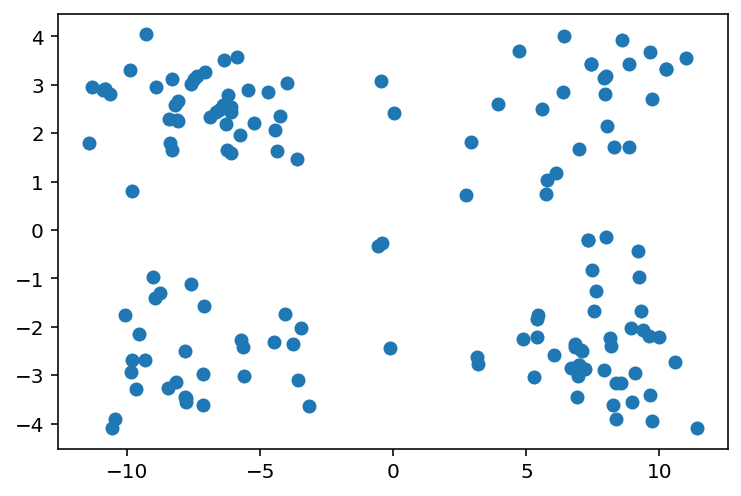

In [62]:
plt.scatter(sample_placements['X'], sample_placements['Y'])

In [63]:
sample_set['ServePlacement']['FirstServe']['AdCourt']['T']

{'Aces': {'Count': 1, 'Coords': [{'X': 5.723, 'Y': -0.136, 'Z': 0.034}]},
 'ServicePointsWon': {'Count': 12,
  'Coords': [{'X': -5.52, 'Y': 0.663, 'Z': 0.037},
   {'X': 5.418, 'Y': -1.36, 'Z': 0.034},
   {'X': 4.967, 'Y': -1.076, 'Z': 0.034},
   {'X': 6.145, 'Y': -1.181, 'Z': 0.033},
   {'X': -4.171, 'Y': 0.946, 'Z': 0.04},
   {'X': 5.466, 'Y': -1.015, 'Z': 0.033},
   {'X': 5.973, 'Y': -0.464, 'Z': 0.033},
   {'X': -5.569, 'Y': 0.408, 'Z': 0.037},
   {'X': 5.423, 'Y': -0.39, 'Z': 0.034},
   {'X': 4.581, 'Y': -0.692, 'Z': 0.033},
   {'X': 5.549, 'Y': -0.576, 'Z': 0.034},
   {'X': 5.973, 'Y': -0.464, 'Z': 0.033}]},
 'ServicePointsLost': {'Count': 2,
  'Coords': [{'X': -4.974, 'Y': 0.959, 'Z': 0.038},
   {'X': 4.86, 'Y': -0.688, 'Z': 0.034}]}}

In [64]:
total_count = 0

for court_side in ['AdCourt', 'DeuceCourt']:
    for direction in ['T', 'Mid', 'Wide']:
        for outcome in ['Aces', 'ServicePointsWon', 'ServicePointsLost']:
            total_count += sample_set['ServePlacement']['FirstServe'][court_side][direction][outcome]['Count']

In [65]:
total_count

47

In [66]:
fsr_pos = pd.DataFrame(sample_set['ReturnPosition']['SecondServe']['Points']['Coords'])

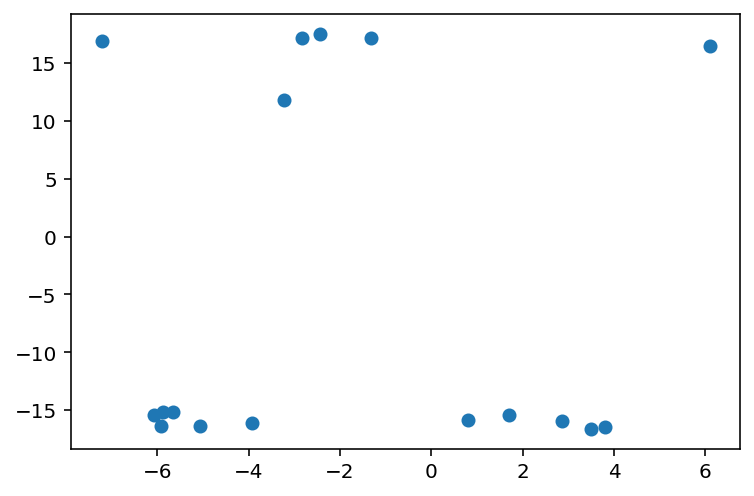

In [67]:
import numpy as np

plt.scatter(fsr_pos['Y'], fsr_pos['X'])

In [68]:
sample_set

{'SetNumber': 0,
 'ServePlacement': {'FirstServe': {'AdCourt': {'PercentageT': '62%',
    'PercentageMid': '21%',
    'PercentageWide': '17%',
    'T': {'Aces': {'Count': 1,
      'Coords': [{'X': 5.723, 'Y': -0.136, 'Z': 0.034}]},
     'ServicePointsWon': {'Count': 12,
      'Coords': [{'X': -5.52, 'Y': 0.663, 'Z': 0.037},
       {'X': 5.418, 'Y': -1.36, 'Z': 0.034},
       {'X': 4.967, 'Y': -1.076, 'Z': 0.034},
       {'X': 6.145, 'Y': -1.181, 'Z': 0.033},
       {'X': -4.171, 'Y': 0.946, 'Z': 0.04},
       {'X': 5.466, 'Y': -1.015, 'Z': 0.033},
       {'X': 5.973, 'Y': -0.464, 'Z': 0.033},
       {'X': -5.569, 'Y': 0.408, 'Z': 0.037},
       {'X': 5.423, 'Y': -0.39, 'Z': 0.034},
       {'X': 4.581, 'Y': -0.692, 'Z': 0.033},
       {'X': 5.549, 'Y': -0.576, 'Z': 0.034},
       {'X': 5.973, 'Y': -0.464, 'Z': 0.033}]},
     'ServicePointsLost': {'Count': 2,
      'Coords': [{'X': -4.974, 'Y': 0.959, 'Z': 0.038},
       {'X': 4.86, 'Y': -0.688, 'Z': 0.034}]}},
    'Mid': {'Aces': {'Coun

In [69]:
widget['PlayerTeam']['Set'][0].keys()

dict_keys(['SetNumber', 'BasicData', 'ServePlacement', 'ReturnPosition', 'ReturnPlacement', 'ShotPlacement'])

In [70]:
widget['PlayerTeam']['Set'][0]['ShotPlacement']['AverageShotSpeed']

{'Backhand': {'Metric': '107.6 KPH', 'Imperial': '66.9 MPH'},
 'Forehand': {'Metric': '119.3 KPH', 'Imperial': '74.2 MPH'}}

In [71]:
widget['OpponentTeam']['Set'][0]['ShotPlacement']['AverageShotSpeed']

{'Backhand': {'Metric': '106.4 KPH', 'Imperial': '66.1 MPH'},
 'Forehand': {'Metric': '127.2 KPH', 'Imperial': '79.1 MPH'}}